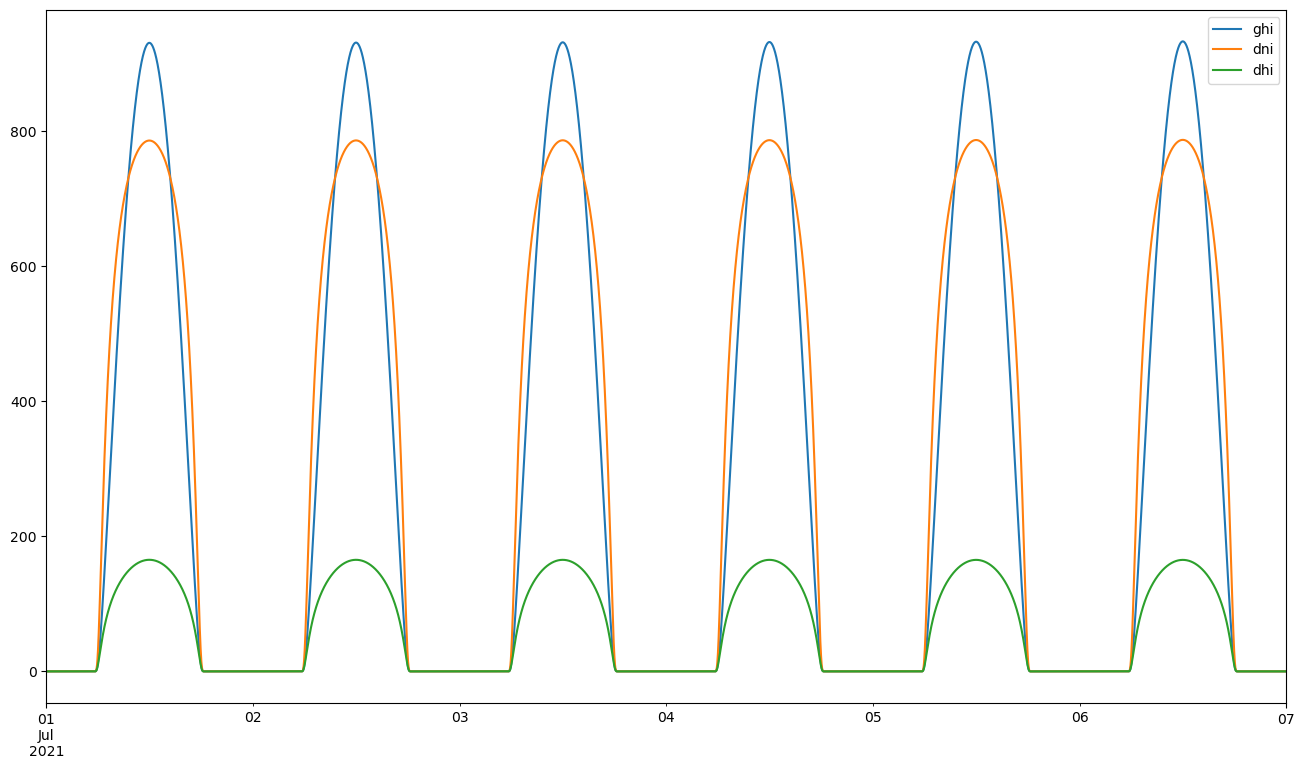

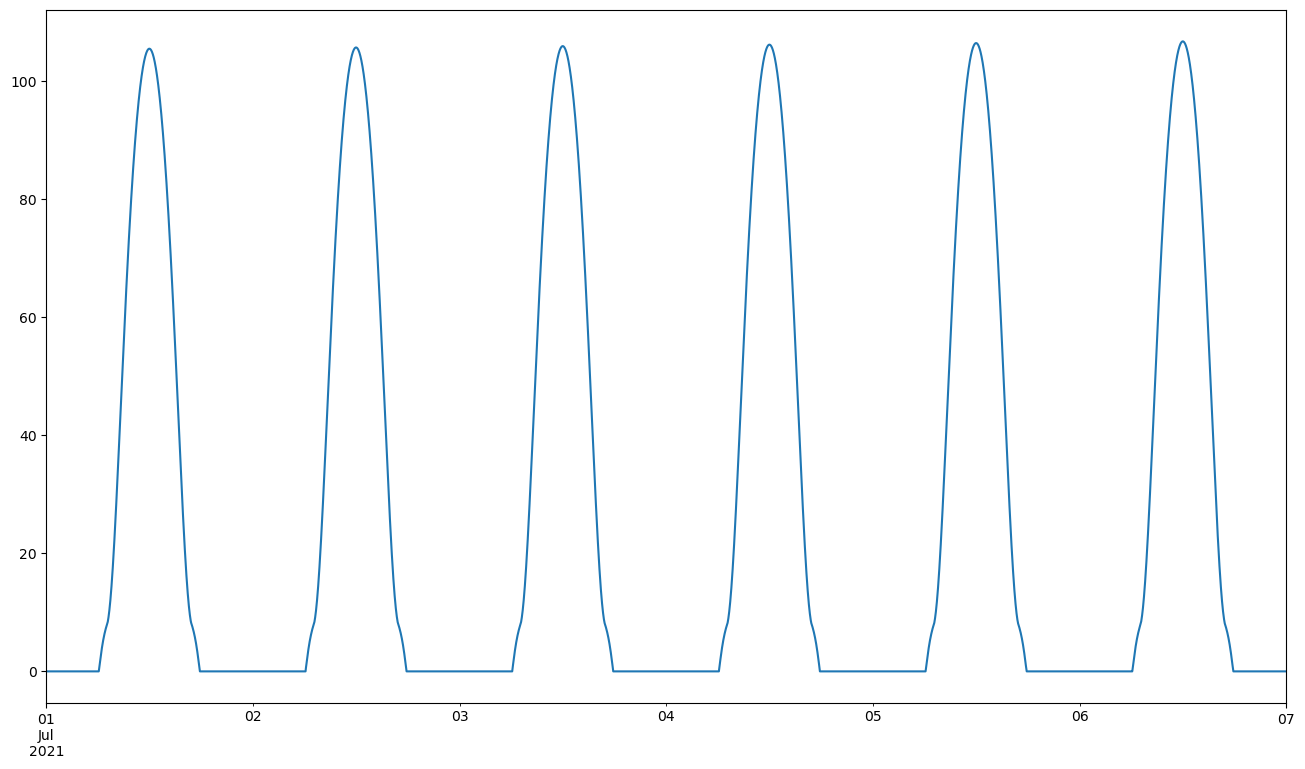

In [15]:
import pvlib
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

import matplotlib.pyplot as plt

import pandas as pd

location = Location(latitude = 9.948427642217785, longitude = 76.56928756213607, tz = 'Indian/Maldives', altitude = 30, name = 'Home')

sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

temperature_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

system = PVSystem(surface_tilt=45, surface_azimuth=180,
                  module_parameters=module, inverter_parameters=inverter,
                  temperature_model_parameters=temperature_parameters) 
modelChain = ModelChain(system,location)

times = pd.date_range(start = '2021-07-01', end='2021-07-07',
                      freq = '1min', tz = location.tz)

clear_sky = location.get_clearsky(times)
clear_sky.plot(figsize=(16,9))
plt.show()

modelChain.run_model(clear_sky)
modelChain.results.ac.plot(figsize=(16,9))
plt.show()